TASK - 2
Project 1: General EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset (assuming it's named 'global_superstore.csv')
try:
    df = pd.read_csv('/content/superstore.csv')
except FileNotFoundError:
    # If file not found, create a sample dataset for demonstration
    data = {
        'Sales': [100, 200, 150, np.nan, 300, 200, 100, 400, 150, 200],
        'Profit': [10, 20, 15, 25, 30, 20, 10, 40, 15, 20],
        'Region': ['East', 'West', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South'],
        'Category': ['Furniture', 'Office Supplies', 'Technology', 'Furniture',
                    'Office Supplies', 'Technology', 'Furniture', 'Office Supplies',
                    'Technology', 'Furniture']
    }
    df = pd.DataFrame(data)

In [2]:
df

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,69,Corporate,2014-12-04 00:00:00.000,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,9,Corporate,2014-12-04 00:00:00.000,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,1,2014-12-18 00:00:00.000,CA-2014-106964,...,12,Home Office,2014-12-21 00:00:00.000,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,1,2014-12-25 00:00:00.000,CA-2014-145219,...,90,Home Office,2014-12-26 00:00:00.000,First Class,15.95,California,Binders,2014,North America,52


In [3]:
# Data Cleaning
# 1. Handle missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Fill missing values with median for numerical columns
for col in ['Sales', 'Profit']:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)


Missing values before cleaning:
Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64


/tmp/ipython-input-3-3428703326.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [4]:
# 2. Remove duplicates
df.drop_duplicates(inplace=True)

# 3. Detect and handle outliers using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

for col in ['Sales', 'Profit']:
    if col in df.columns:
        df = handle_outliers(df, col)

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64


In [5]:
# Statistical Analysis
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
           Discount      记录数        Profit      Quantity       Row.ID  \
count  51290.000000  51290.0  51290.000000  51290.000000  51290.00000   
mean       0.142908      1.0     18.092440      3.476545  25645.50000   
std        0.212280      0.0     39.851666      2.278766  14806.29199   
min        0.000000      1.0    -55.215000      1.000000      1.00000   
25%        0.000000      1.0      0.000000      2.000000  12823.25000   
50%        0.000000      1.0      9.240000      3.000000  25645.50000   
75%        0.200000      1.0     36.810000      5.000000  38467.75000   
max        0.850000      1.0     92.025000     14.000000  51290.00000   

              Sales  Shipping.Cost          Year       weeknum  
count  51290.000000   51290.000000  51290.000000  51290.000000  
mean     172.311464      26.375818   2012.777208     31.287112  
std      189.977752      57.296810      1.098931     14.429795  
min        0.000000       0.002000   2011.000000      1.0000

In [6]:
# Correlation analysis
if {'Sales', 'Profit'}.issubset(df.columns):
    print("\nCorrelation between Sales and Profit:")
    print(df[['Sales', 'Profit']].corr())


Correlation between Sales and Profit:
           Sales    Profit
Sales   1.000000  0.483298
Profit  0.483298  1.000000


Text(0.5, 1.0, 'Profit Distribution')

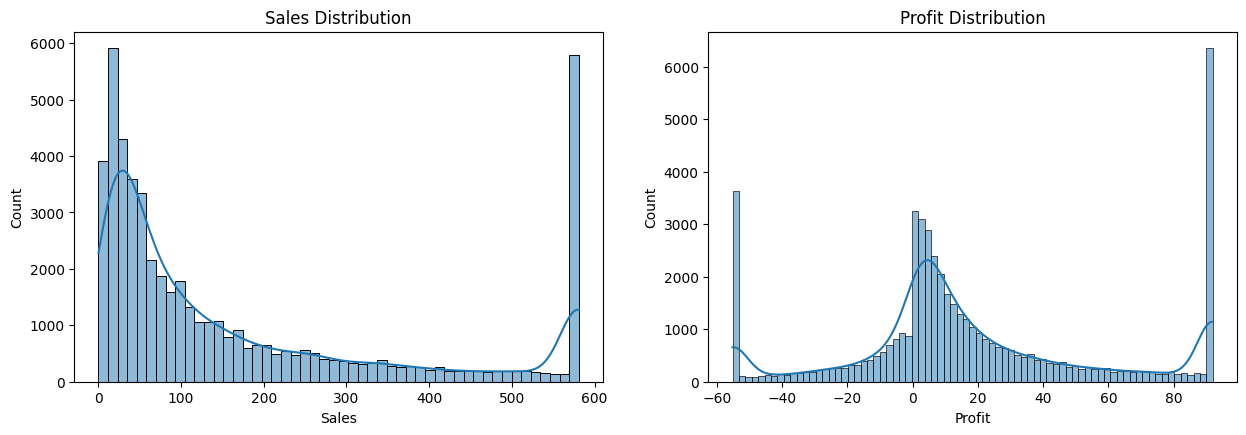

In [8]:
# Data Visualization
plt.figure(figsize=(15, 10))
# 1. Histograms
plt.subplot(2, 2, 1)
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Profit'], kde=True)
plt.title('Profit Distribution')

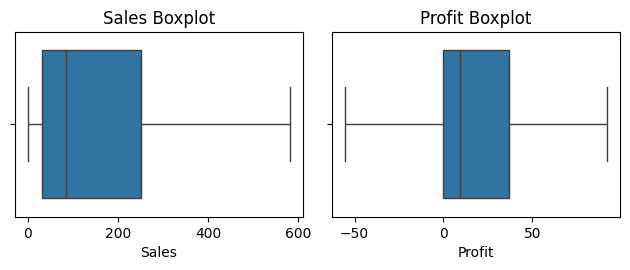

In [9]:
# 2. Boxplots
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Sales'])
plt.title('Sales Boxplot')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['Profit'])
plt.title('Profit Boxplot')

plt.tight_layout()
plt.show()

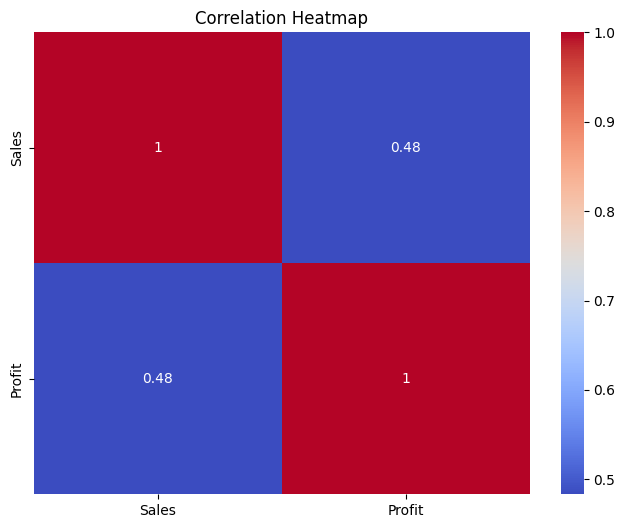

In [10]:
# 3. Heatmap
if {'Sales', 'Profit'}.issubset(df.columns):
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[['Sales', 'Profit']].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

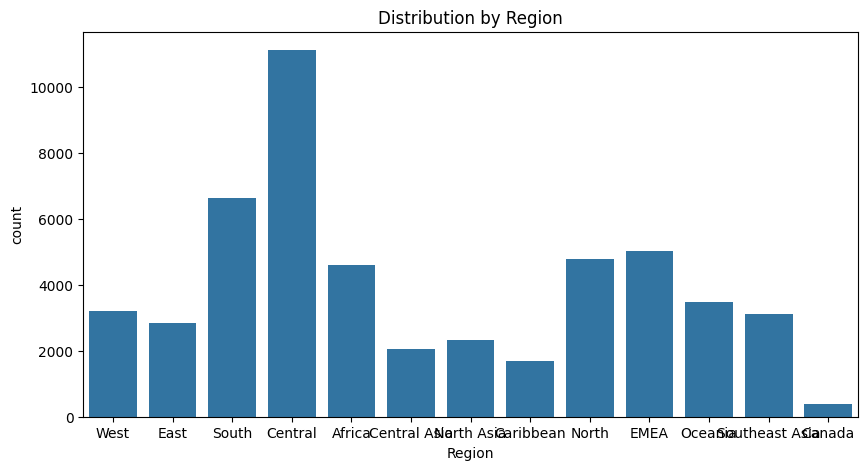

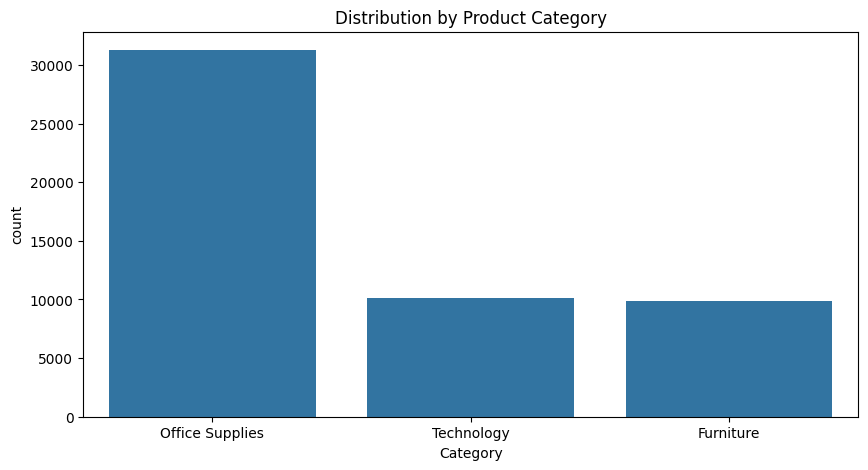

In [11]:
# Categorical analysis
if 'Region' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='Region')
    plt.title('Distribution by Region')
    plt.show()

if 'Category' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='Category')
    plt.title('Distribution by Product Category')
    plt.show()

Project 2: Sales Performance Analysis

In [14]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate synthetic data
np.random.seed(42)
products = ['Laptop', 'Smartphone', 'T-Shirt', 'Coffee Maker', 'Grocery Bundle', 'Headphones', 'Desk Chair']
regions = ['East', 'West', 'North', 'South']
categories = ['Electronics', 'Clothing', 'Home', 'Food']

# Create 100 rows of data
data = {
    'Product': np.random.choice(products, 100),
    'Region': np.random.choice(regions, 100),
    'Sales': np.random.randint(50, 2000, 100),
    'Profit': np.random.randint(5, 500, 100),
    'Discount': np.round(np.random.uniform(0, 0.3, 100), 2),
    'Category': np.random.choice(categories, 100),
    'Date': [(datetime(2023, 1, 1) + timedelta(days=np.random.randint(0, 365))) for _ in range(100)]
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv('sales_data.csv', index=False)
print("File saved as 'sales_data.csv'")

File saved as 'sales_data.csv'


In [15]:
df

,Product,Region,Sales,Profit,Discount,Category,Date
0,Desk Chair,South,798,259,0.30,Clothing,2023-06-28
1,Coffee Maker,West,1728,298,0.05,Electronics,2023-04-11
2,Grocery Bundle,North,1244,284,0.01,Clothing,2023-09-25
3,Desk Chair,South,590,329,0.15,Home,2023-11-19
4,T-Shirt,East,1109,376,0.05,Home,2023-03-06
...,...,...,...,...,...,...,...
95,Headphones,South,1512,342,0.01,Clothing,2023-09-10
96,Coffee Maker,West,252,198,0.12,Home,2023-08-18
97,Headphones,East,1257,314,0.13,Food,2023-01-07
98,Desk Chair,North,172,167,0.22,Electronics,2023-06-23


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime


In [18]:
# Data Cleaning
# 1. Remove duplicates
df.drop_duplicates(inplace=True)

# 2. Handle missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Fill missing values
for col in ['Sales', 'Profit', 'Discount']:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

Missing values before cleaning:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


/tmp/ipython-input-18-2453744403.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [22]:
# For categorical columns
for col in ['Product', 'Region', 'Category']:
    if col in df.columns:
        df[col].fillna('Unknown', inplace=True)

# 3. Convert Date to datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    df['Quarter'] = df['Date'].dt.quarter

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
Month       0
Quarter     0
dtype: int64


/tmp/ipython-input-22-813760746.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


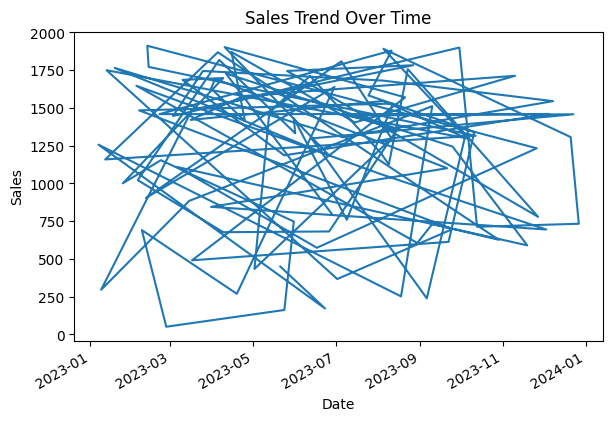

In [34]:
# Exploratory Data Analysis
plt.figure(figsize=(15, 10))

# 1. Time series plot of Sales
if {'Date', 'Sales'}.issubset(df.columns):
    plt.subplot(2, 2, 1)
    df.set_index('Date')['Sales'].plot()
    plt.title('Sales Trend Over Time')
    plt.ylabel('Sales')

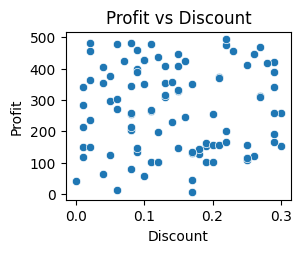

In [35]:
# 2. Scatter plot of Profit vs Discount
if {'Profit', 'Discount'}.issubset(df.columns):
    plt.subplot(2, 2, 2)
    sns.scatterplot(data=df, x='Discount', y='Profit')
    plt.title('Profit vs Discount')

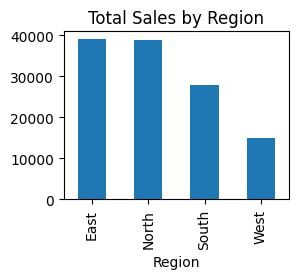

In [36]:
# 3. Sales by Region
if {'Region', 'Sales'}.issubset(df.columns):
    plt.subplot(2, 2, 3)
    df.groupby('Region')['Sales'].sum().plot(kind='bar')
    plt.title('Total Sales by Region')

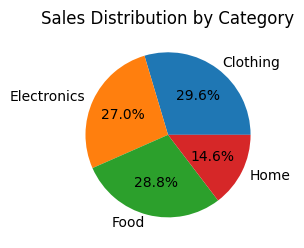

In [37]:
# 4. Sales by Category
if {'Category', 'Sales'}.issubset(df.columns):
    plt.subplot(2, 2, 4)
    df.groupby('Category')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Sales Distribution by Category')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [38]:
# Predictive Modeling
if {'Sales', 'Profit', 'Discount'}.issubset(df.columns):
    # Prepare data
    X = df[['Profit', 'Discount']]
    y = df['Sales']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
 # Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
 # Predictions
y_pred = model.predict(X_test)

In [43]:

    # Evaluate model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nModel Performance:")
print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")



Model Performance:
R² Score: -0.37
Mean Squared Error: 304560.20


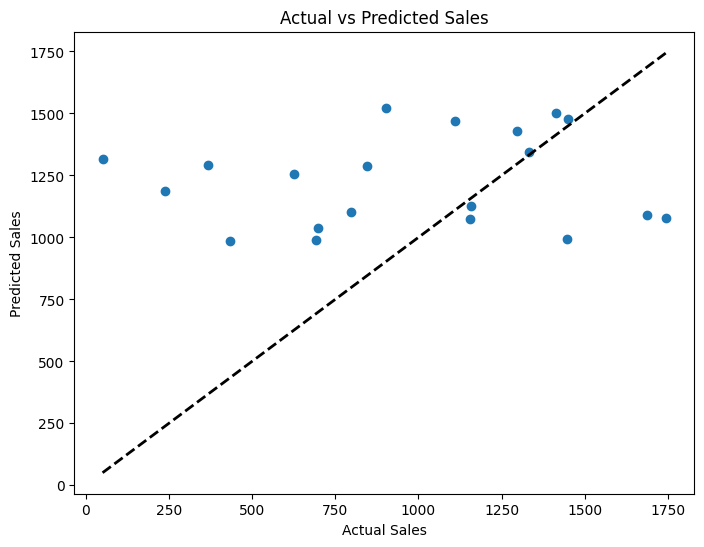

In [45]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [46]:
# Print coefficients
print("\nModel Coefficients:")
print(f"Profit coefficient: {model.coef_[0]:.2f}")
print(f"Discount coefficient: {model.coef_[1]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


Model Coefficients:
Profit coefficient: 1.08
Discount coefficient: -961.17
Intercept: 1109.43


In [51]:
# Insights and Recommendations
print("\nInsights and Recommendations:")
if {'Region', 'Sales'}.issubset(df.columns):
    top_region = df.groupby('Region')['Sales'].sum().idxmax()
    print(f"- The top-performing region is {top_region}. Consider allocating more resources here.")

if {'Category', 'Sales'}.issubset(df.columns):
    top_category = df.groupby('Category')['Sales'].sum().idxmax()
    print(f"- The highest sales come from {top_category} category. Focus marketing efforts here.")

if {'Discount', 'Profit'}.issubset(df.columns):
    # Find optimal discount range (where profit is highest)
    discount_bins = pd.cut(df['Discount'], bins=5)
    optimal_discount = df.groupby(discount_bins)['Profit'].mean().idxmax()
    print(f"- The optimal discount range for maximizing profit appears to be {optimal_discount}.")


Insights and Recommendations:
- The top-performing region is East. Consider allocating more resources here.
- The highest sales come from Clothing category. Focus marketing efforts here.
- The optimal discount range for maximizing profit appears to be (0.06, 0.12].


/tmp/ipython-input-51-3146676744.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  optimal_discount = df.groupby(discount_bins)['Profit'].mean().idxmax()
